# Allen Dataset

In [1]:
import os, json
import sys
import time
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from data_loader import load_data

## Allen data

In [2]:
_, _, obs_train, obs_test = load_data("allen/SmallRepickledAllenDatawI", 1, False, False)
obs_train.shape, obs_test.shape

((30, 1000, 1), (10, 1000, 1))

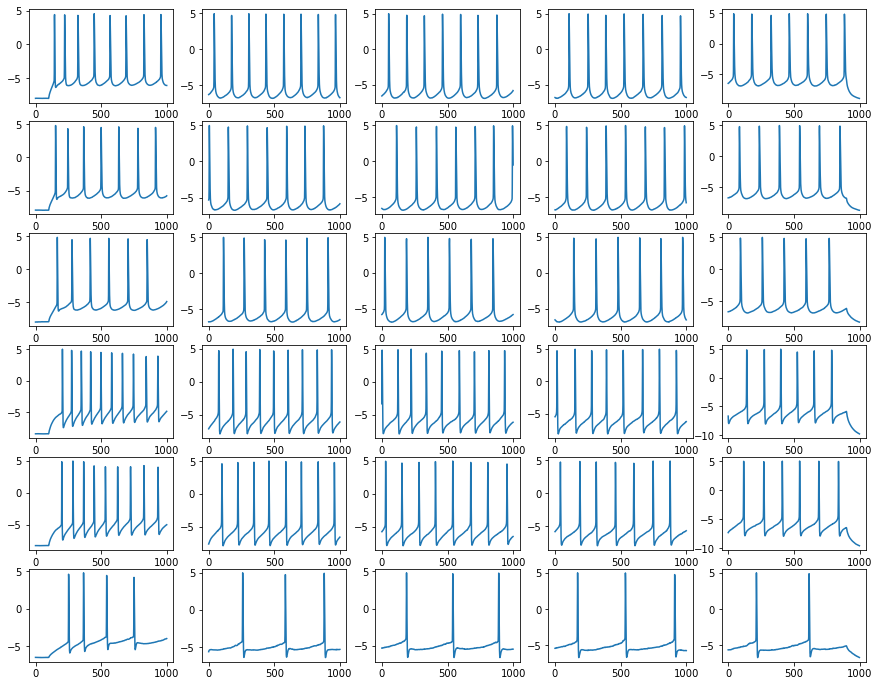

In [10]:
fig, ax = plt.subplots(6,5,figsize=(15,12))
for i in range(30):
    i0 = i//5
    i1 = i%5
    ax[i0,i1].plot(obs_train[i,:,0])

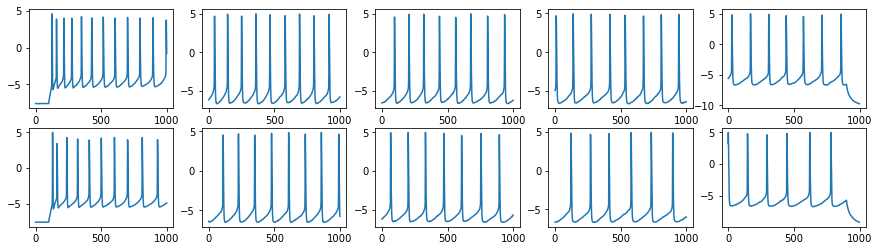

In [11]:
fig, ax = plt.subplots(2,5,figsize=(15,4))
for i in range(10):
    i0 = i//5
    i1 = i%5
    ax[i0,i1].plot(obs_test[i,:,0])
#fig.savefig("allen/test_data.pdf", bbox_inches="tight")

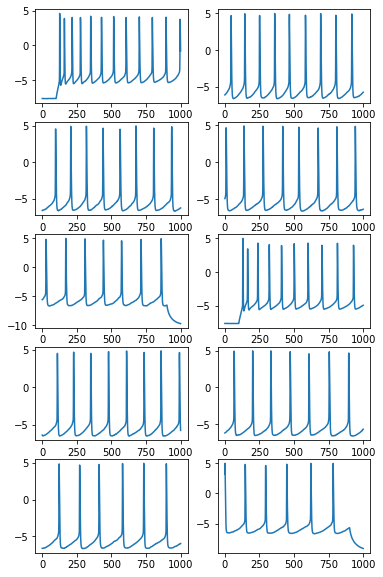

In [3]:
fig, ax = plt.subplots(5,2,figsize=(6,10))
for i in range(10):
    i0 = i//2
    i1 = i%2
    ax[i0,i1].plot(obs_test[i,:,0])
#fig.savefig("allen/test_data.pdf", bbox_inches="tight")

In [15]:
train_max = np.absolute(obs_train).max(axis=1)[:,0] #(ns)
test_max = np.absolute(obs_test).max(axis=1)[:,0] #(ns)
new_obs_train = (obs_train[:,:,0].T/train_max).T.reshape(30,1000,1).astype("float32")
new_obs_test = (obs_test[:,:,0].T/test_max).T.reshape(10,1000,1).astype("float32")

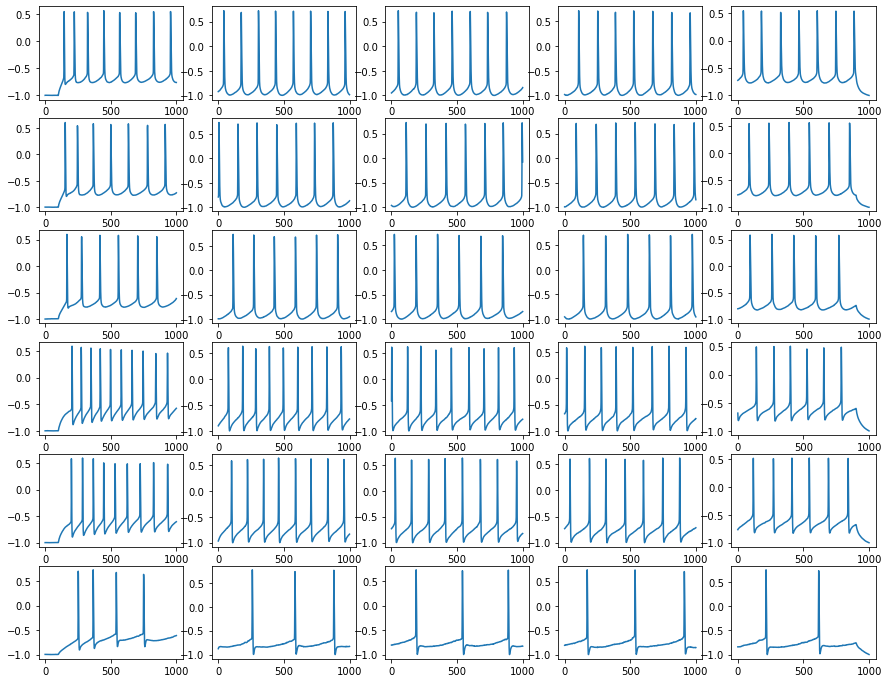

In [17]:
fig, ax = plt.subplots(6,5,figsize=(15,12))
for i in range(30):
    i0 = i//5
    i1 = i%5
    ax[i0,i1].plot(new_obs_train[i,:,0])

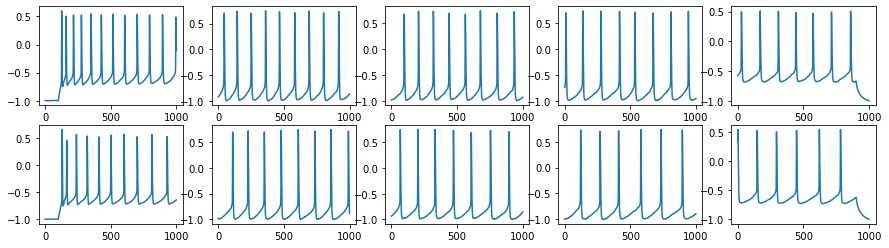

In [18]:
fig, ax = plt.subplots(2,5,figsize=(15,4))
for i in range(10):
    i0 = i//5
    i1 = i%5
    ax[i0,i1].plot(new_obs_test[i,:,0])
#fig.savefig("allen/test_data.pdf", bbox_inches="tight")

In [16]:
np.save("allen/normalized_train.npy", new_obs_train)
np.save("allen/normalized_test.npy", new_obs_test)
np.save("allen/train_max2.npy", train_max)
np.save("allen/test_max2.npy", test_max)